# Seasonal evolution of TIWP

This notebook displays the seasonal evolution of TIWP.

In [55]:
from pathlib import Path 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import datetime
import pandas as pd 
import cartopy.crs as ccrs
import seaborn as sns
import cmocean as cmo
mpl.style.use("../ccic.mplstyle") 

path = Path('/scratch/ccic_record/data')
mask = xr.open_dataset(path / 'mask_24.nc')
mask = mask.mask.astype(int)

## CCIC (GridSat)

In [124]:
ccic = path / 'ccic' / 'gridsat'/  'ccic_gridsat_monmean.nc'
ccic_ds = xr.open_dataset(ccic)
ccic_ds = ccic_ds.assign_coords({"month": ccic_ds.month.dt.month})
# apply mask 
mask_ccic= mask.interp(coords = {'longitude': ccic_ds.longitude.values, 'latitude': ccic_ds.latitude.values}, method = 'linear') 

# calculate anomaly of TIWP
#tiwp = (ccic_ds.tiwp - ccic_ds.tiwp.mean('month') ) / ccic_ds.tiwp.mean('month') 

# average over longitude 
tiwp = ccic_ds.tiwp

ccic_gridsat_hovmoller =tiwp.where(mask_ccic > 0).mean('longitude')
# calculate anomaly based on zonal means 
ccic_gridsat_hovmoller_a =  ccic_gridsat_hovmoller - ccic_gridsat_hovmoller.mean('month')
ccic_gridsat_hovmoller_n =  (ccic_gridsat_hovmoller - ccic_gridsat_hovmoller.mean('month') ) / ccic_gridsat_hovmoller.mean('month') 

# mean for each season 
ccic_seas = dict()
ccic_seas['JJA'] = ccic_ds.tiwp.where( (ccic_ds.month.month >=6) & (ccic_ds.month.month <=8)).mean('month') 
ccic_seas['MAM'] = ccic_ds.tiwp.where( (ccic_ds.month.month >=3) & (ccic_ds.month.month <=5)).mean('month') 
ccic_seas['SON'] = ccic_ds.tiwp.where( (ccic_ds.month.month >=9) & (ccic_ds.month.month <=11)).mean('month') 
ccic_seas['DJF'] = ccic_ds.tiwp.where( (ccic_ds.month.month ==12) | (ccic_ds.month.month == 1 ) | (ccic_ds.month.month == 2 )).mean('month') 

## CCIC (CPCIR)

In [140]:
ccic = path / 'processed'/  'ccic_cpcir_tiwp_ca.nc'
ccic_ds = xr.load_dataset(ccic)
ccic_ds = ccic_ds.assign_coords({"month": ccic_ds.month + 1})
# apply mask 
mask_ccic= mask.interp(coords = {'longitude': ccic_ds.longitude.values, 'latitude': ccic_ds.latitude.values}, method = 'linear')
# average over longitude 
ccic_cpcir_hovmoller = ccic_ds.tiwp_monthly.mean('longitude')
ccic_cpcir_hovmoller_a = ccic_cpcir_hovmoller - ccic_cpcir_hovmoller.mean("month")
ccic_cpcir_hovmoller_n = (ccic_cpcir_hovmoller - ccic_cpcir_hovmoller.mean("month")) / ccic_cpcir_hovmoller.mean('month')

# mean for each season 
ccic_seas_cpcir = dict()
ccic_seas_cpcir['JJA'] = ccic_ds.tiwp.where( (ccic_ds.month >=6) & (ccic_ds.month <=8)).mean('month') 
ccic_seas_cpcir['MAM'] = ccic_ds.tiwp.where( (ccic_ds.month >=3) & (ccic_ds.month <=5)).mean('month') 
ccic_seas_cpcir['SON'] = ccic_ds.tiwp.where( (ccic_ds.month >=9) & (ccic_ds.month <=11)).mean('month') 
ccic_seas_cpcir['DJF'] = ccic_ds.tiwp.where( (ccic_ds.month ==12) | (ccic_ds.month == 1 ) | (ccic_ds.month == 2 )).mean('month') 

In [142]:
ccic_cpcir_hovmoller_n

<xarray.DataArray 'tiwp_monthly' (month: 12, latitude: 3298)> Size: 317kB
array([[ 0.18143716,  0.16272939,  0.15360543, ..., -0.21301831,
        -0.20294114, -0.19061994],
       [ 0.09439702,  0.07428793,  0.06554619, ..., -0.16356537,
        -0.15300454, -0.13963576],
       [-0.07682363, -0.09247379, -0.10183165, ..., -0.04727387,
        -0.0406846 , -0.03094548],
       ...,
       [ 0.21275647,  0.21382033,  0.21104441, ...,  0.09218736,
         0.08760532,  0.0781573 ],
       [ 0.22690512,  0.21023696,  0.20332737, ..., -0.0137732 ,
        -0.01278474, -0.01285237],
       [ 0.22792767,  0.20838747,  0.20184465, ..., -0.15832271,
        -0.15161608, -0.1438481 ]])
Coordinates:
  * latitude  (latitude) float32 13kB 59.98 59.95 59.91 ... -59.91 -59.95 -59.98
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

## DARDAR/2C-ICE

In [126]:
# DARDAR and 2C-ICE
cloudsat = xr.open_dataset( path / 'processed'/ 'cloudsat_ccic_tiwp_ca.nc')
tiwp_2cice = cloudsat.tiwp_monthly_2cice 
tiwp_dardar = cloudsat.tiwp_monthly_dardar

In [127]:
dardar_hovmoller = tiwp_dardar.where(tiwp_dardar < 1e3).mean('longitude')
dardar_hovmoller_a = dardar_hovmoller - dardar_hovmoller.mean("month")
dardar_hovmoller_n = (dardar_hovmoller - dardar_hovmoller.mean("month")) / dardar_hovmoller.mean('month')
twocice_hovmoller = tiwp_2cice.mean('longitude')
twocice_hovmoller_a = twocice_hovmoller - twocice_hovmoller.mean("month")
twocice_hovmoller_n = (twocice_hovmoller - twocice_hovmoller.mean("month")) / twocice_hovmoller.mean("month")

## ERA5

In [128]:
era5 = path / 'ERA5' / 'era5_tcsw_tciw_tcc_1980_2023_monmean.nc'
era5_ds = xr.open_dataset(era5)
era5_tiwp = era5_ds.tcsw + era5_ds.tciw
# apply mask 
mask_era5= mask.interp(coords = {'longitude': era5_ds.longitude.values, 'latitude': era5_ds.latitude.values}, method = 'linear')

# calculate anomaly of TIWP
#tiwp = (era5_tiwp - era5_tiwp.mean('time') ) / era5_tiwp.mean('time') 

# average over longitude 
tiwp = era5_tiwp[{"expver": 0}]
era5_hovmoller = tiwp.where(mask_era5 > 0).mean('longitude')
# calculate anomaly based on zonal means 
era5_hovmoller_a =  (era5_hovmoller - era5_hovmoller.mean('time'))
era5_hovmoller_n =  (era5_hovmoller - era5_hovmoller.mean('time')) / era5_hovmoller.mean('time') 


# mean for each season
era5_seas = dict()
era5_seas['JJA'] = era5_tiwp.where( (era5_ds.time.dt.month >=  6 ) & (era5_ds.time.dt.month <=  8)).mean('time')[0]
era5_seas['MAM'] = era5_tiwp.where( (era5_ds.time.dt.month >=  3 ) & (era5_ds.time.dt.month <=  5)).mean('time')[0]
era5_seas['SON'] = era5_tiwp.where( (era5_ds.time.dt.month >=  9 ) & (era5_ds.time.dt.month <=  11)).mean('time')[0]
era5_seas['DJF'] = era5_tiwp.where( (era5_ds.time.dt.month ==  12)| (era5_ds.time.dt.month ==    1 ) | (era5_ds.time.dt.month == 2 )).mean('time')[0]

## MODIS

In [129]:
modis = xr.open_dataset(path / 'processed' / 'modis_global_distribution_cf_tiwp_by_month.nc').rename(lat="latitude", lon="longitude")
modis_tiwp = modis.TIWP_global_distribution_masked / 1000

# calculate anomaly of TIWP
tiwp = (modis_tiwp - modis_tiwp.mean('month') ) / modis_tiwp.mean('month') 
# average over longitude 
tiwp = modis_tiwp.transpose("month", "latitude", "longitude")
modis_hovmoller = tiwp.mean('longitude')

# calculate anomaly based on zonal means 
modis_hovmoller_a =  (modis_hovmoller - modis_hovmoller.mean('month'))
modis_hovmoller_n =  (modis_hovmoller - modis_hovmoller.mean('month')) / modis_hovmoller.mean('month') 

#modis_seas = dict()
#modis_seas['JJA'] = modis_tiwp.where( (modis_ds.time.dt.month >=6) & (modis_ds.time.dt.month <=8)).mean('time')
#modis_seas['MAM'] = modis_tiwp.where( (modis_ds.time.dt.month >=3) & (modis_ds.time.dt.month <=5)).mean('time')
#modis_seas['SON'] = modis_tiwp.where( (modis_ds.time.dt.month >=9) & (modis_ds.time.dt.month <=11)).mean('time')
#modis_seas['DJF'] = modis_tiwp.where( (modis_ds.time.dt.month == 12) | (modis_ds.time.dt.month == 1 ) | (modis_ds.time.dt.month == 2 )).mean('time') 

## PATMOS-x

In [130]:
patmos_ds = xr.open_dataset(path / 'PATMOS-x' / 'means' / 'PATMOS-x_timeseries198108-202106_notebook_results.nc') 

# apply mask 
mask_patmos = mask.interp(coords = {'longitude': patmos_ds.longitude.values, 'latitude': patmos_ds.latitude.values}, method = 'linear')
# average over longitude 
patmos_tiwp = patmos_ds.tiwp_fullrecord_monthlymean.where(mask_patmos > 0) / 1000

# calculate anomaly of TIWP
tiwp = (patmos_tiwp - patmos_tiwp.mean('month') ) / patmos_tiwp.mean('month') 
tiwp = patmos_tiwp
patmos_hovmoller = tiwp.mean('longitude')
# calculate anomaly based on zonal means 
patmos_hovmoller_a =  (patmos_hovmoller - patmos_hovmoller.mean('month'))
patmos_hovmoller_n =  (patmos_hovmoller - patmos_hovmoller.mean('month'))  / patmos_hovmoller.mean('month') 

# mean for each season
#patmos_seas = dict()
#patmos_seas['JJA'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=6) & (patmos_ds.time.dt.month <=8)).mean('time')
#patmos_seas['MAM'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=3) & (patmos_ds.time.dt.month <=5)).mean('time')
#patmos_seas['SON'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=9) & (patmos_ds.time.dt.month <=11)).mean('time')
#patmos_seas['DJF'] = patmos_tiwp.where( (patmos_ds.time.dt.month == 12) | (patmos_ds.time.dt.month == 1 ) | (patmos_ds.time.dt.month == 2 )).mean('time') 

## ISCCP

In [136]:
isccp = path / 'processed' / 'isccp_tiwp_ca.nc'
isccp_ds = xr.open_dataset(isccp) 
isccp_ds = isccp_ds.assign_coords({"month": isccp_ds.month.data + 1})

# apply mask 
mask_isccp = mask.interp(coords = {'longitude': isccp_ds.longitude.values, 'latitude': isccp_ds.latitude.values}, method = 'linear')

# calculate anomaly of TIWP

tiwp_monthly = (isccp_ds.tiwp_monthly- isccp_ds.tiwp_monthly.mean('month') ) / isccp_ds.tiwp_monthly.mean('month') 
tiwp_monthly = isccp_ds.tiwp_monthly
# average over longitude 
isccp_hovmoller = tiwp_monthly.where(mask_isccp > 0).mean('longitude')

# calculate anomaly based on zonal means 
isccp_hovmoller_a = isccp_hovmoller - isccp_hovmoller.mean('month')
isccp_hovmoller_n = (isccp_hovmoller - isccp_hovmoller.mean('month'))  / isccp_hovmoller.mean('month') 

### Global maps by season 

In [132]:
plt.figure(figsize=(24,10))

rows = 3
cols = 4 
levels = [0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]
cmap = plt.cm.Blues
fs = 16

for idx, seas in enumerate(ccic_seas.keys() ):
    ccic_data = ccic_seas[seas]
    era5_data = era5_seas[seas]
    patmos_data = patmos_seas[seas] / 1000 

    # CCIC 
    ax = plt.subplot(rows, cols, idx +1, projection=ccrs.Robinson())
    # Contour plot
    cs=ax.contourf(ccic_data.longitude, ccic_data.latitude, ccic_data,
                      transform = ccrs.PlateCarree(),levels = levels,
                      cmap=cmap,extend='both')

    #ax.text(-0.07, 0.55, 'CCIC', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor')


    # Title each subplot with the name of the model
    ax.set_title(seas, fontsize = 20)
    
    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 

    # ERA5 
    ax = plt.subplot(rows, cols, idx + 5, projection=ccrs.Robinson() )
    # Contour plot
    cs=ax.contourf(era5_data.longitude, era5_data.latitude, era5_data, levels = levels,
                      transform = ccrs.PlateCarree(),
                      cmap=cmap ,extend='both')


    #ax.text(-0.07, 0.55, 'ERA5', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes)


    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 
   
plt.savefig(path / 'plots' / 'global_maps_by_season.png', bbox_inches = 'tight')
plt.show()

NameError: name 'patmos_seas' is not defined

<Figure size 3600x1500 with 0 Axes>

In [ ]:


    # PATMOS-X
    ax = plt.subplot(rows, cols, idx + 9, projection=ccrs.Robinson() )
    # Contour plot
    cs=ax.contourf(patmos_data.longitude, patmos_data.latitude,patmos_data, 
                      transform = ccrs.PlateCarree(),
                      cmap=cmap ,extend='both')
    
    #ax.text(-0.07, 0.55, 'PATMOS-X', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes)

    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 


# Hovmoller diagrams: Monthly latitudinal propagation of the ITCZ

In [39]:
res.dims

('month', 'latitude')

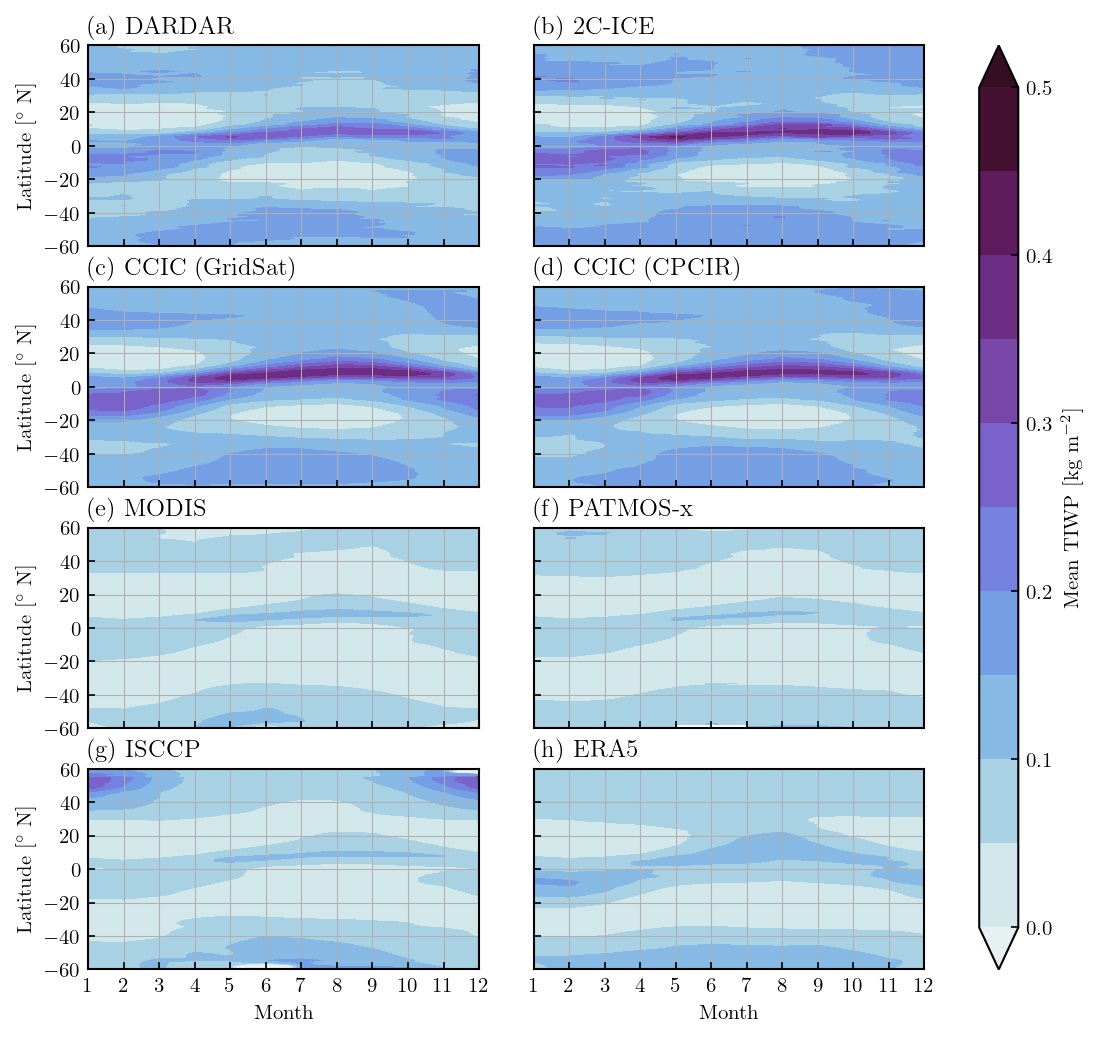

In [133]:
import matplotlib 
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib import colormaps

fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 3, width_ratios=[1.0, 1.0, 0.1])
              
levels = np.linspace(0, 0.5, 11)
cmap = colormaps["cmo.dense"]

results = {
    "DARDAR": dardar_hovmoller,
    "2C-ICE": twocice_hovmoller,
    "CCIC (GridSat)": ccic_gridsat_hovmoller,
    "CCIC (CPCIR)": ccic_cpcir_hovmoller,
    "MODIS": modis_hovmoller,
    "PATMOS-x": patmos_hovmoller,
    "ISCCP": isccp_hovmoller,
    "ERA5": era5_hovmoller
}


for ind, (name, res) in enumerate(results.items()):
    row_ind = ind // 2
    col_ind = ind % 2
    
    ax = fig.add_subplot(gs[row_ind, col_ind])
    ax.set_title(f"({chr(ord('a') + ind)}) {name}")
    lats = res.latitude
    month = res.month if "month" in res.dims else res.time.dt.month
    if name == "MODIS":
        m = ax.contourf(month, lats, res[..., ::-1].T, levels=levels, extend="both", cmap=cmap)
    else:
        m = ax.contourf(month, lats, res.T, levels=levels, extend="both", cmap=cmap)
    ax.set_ylim(-60, 60)

    ax.set_yticks(np.linspace(-60, 60, 7))
    ax.set_xticks(np.arange(1, 13))

    if col_ind > 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("Latitude [$^\circ$ N]")

    if row_ind < 3:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Month")

    ax.grid(True)


cbar_ax = fig.add_subplot(gs[:, -1])
fig.colorbar(m, cax=cbar_ax, label="Mean TIWP [kg m$^{-2}]$")
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(Path("..") / "figures" / "hovmoller_absolute.png", bbox_inches = 'tight')
plt.show()

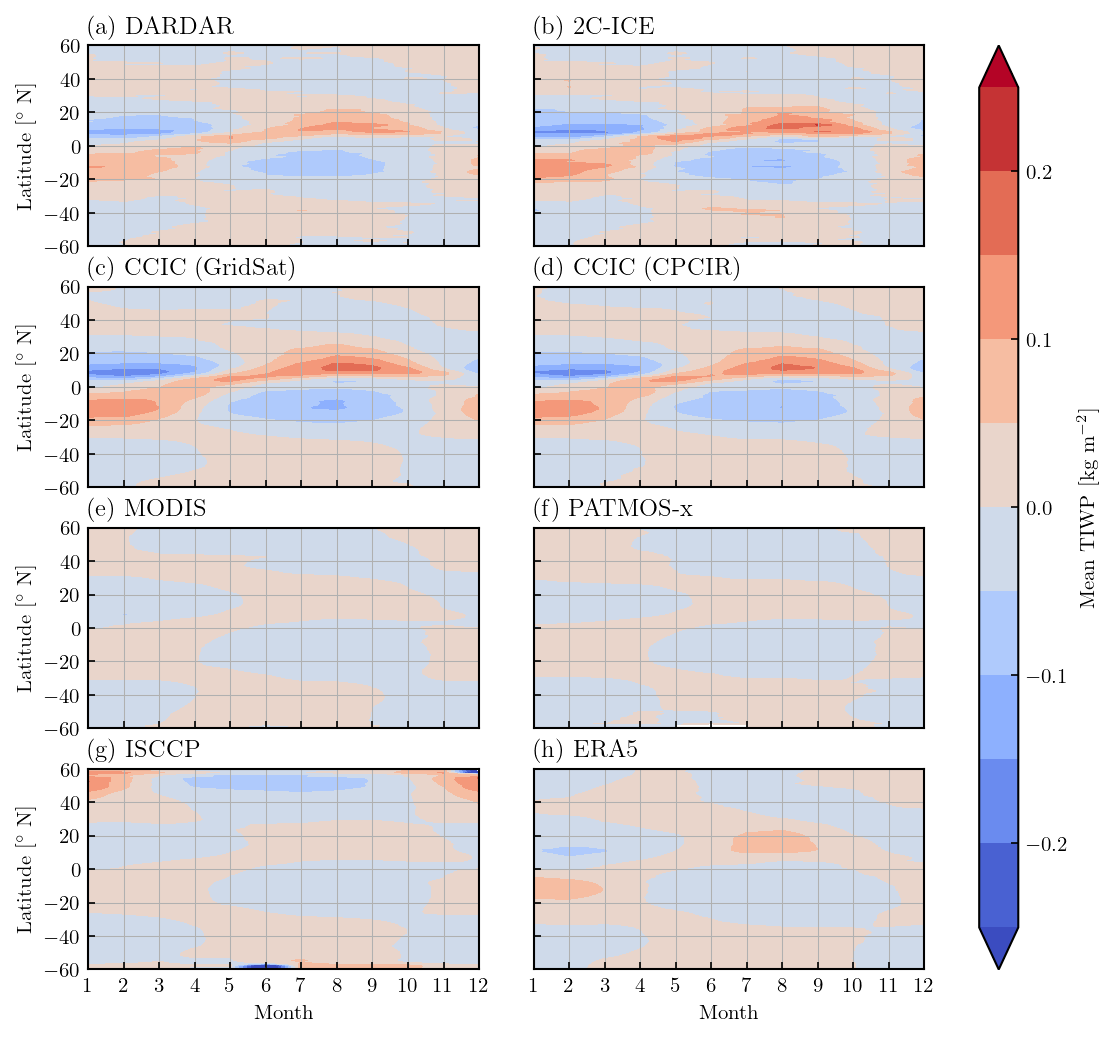

In [137]:
import matplotlib 
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib import colormaps

fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 3, width_ratios=[1.0, 1.0, 0.1])
              
levels = np.linspace(-0.25, 0.25, 11)
cmap = colormaps["coolwarm"]

results = {
    "DARDAR": dardar_hovmoller_a,
    "2C-ICE": twocice_hovmoller_a,
    "CCIC (GridSat)": ccic_gridsat_hovmoller_a,
    "CCIC (CPCIR)": ccic_cpcir_hovmoller_a,
    "MODIS": modis_hovmoller_a,
    "PATMOS-x": patmos_hovmoller_a,
    "ISCCP": isccp_hovmoller_a,
    "ERA5": era5_hovmoller_a
}


for ind, (name, res) in enumerate(results.items()):
    row_ind = ind // 2
    col_ind = ind % 2
    
    ax = fig.add_subplot(gs[row_ind, col_ind])
    ax.set_title(f"({chr(ord('a') + ind)}) {name}")
    lats = res.latitude
    month = res.month if "month" in res.dims else res.time.dt.month
    if name == "MODIS":
        m = ax.contourf(month, lats, res[..., ::-1].T, levels=levels, extend="both", cmap=cmap)
    else:
        m = ax.contourf(month, lats, res.T, levels=levels, extend="both", cmap=cmap)
    ax.set_ylim(-60, 60)

    ax.set_yticks(np.linspace(-60, 60, 7))
    ax.set_xticks(np.arange(1, 13))

    if col_ind > 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("Latitude [$^\circ$ N]")

    if row_ind < 3:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Month")

    ax.grid(True)


cbar_ax = fig.add_subplot(gs[:, -1])
fig.colorbar(m, cax=cbar_ax, label="Mean TIWP [kg m$^{-2}]$")
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(Path("..") / "figures" / "hovmoller_absolute.png", bbox_inches = 'tight')
plt.show()

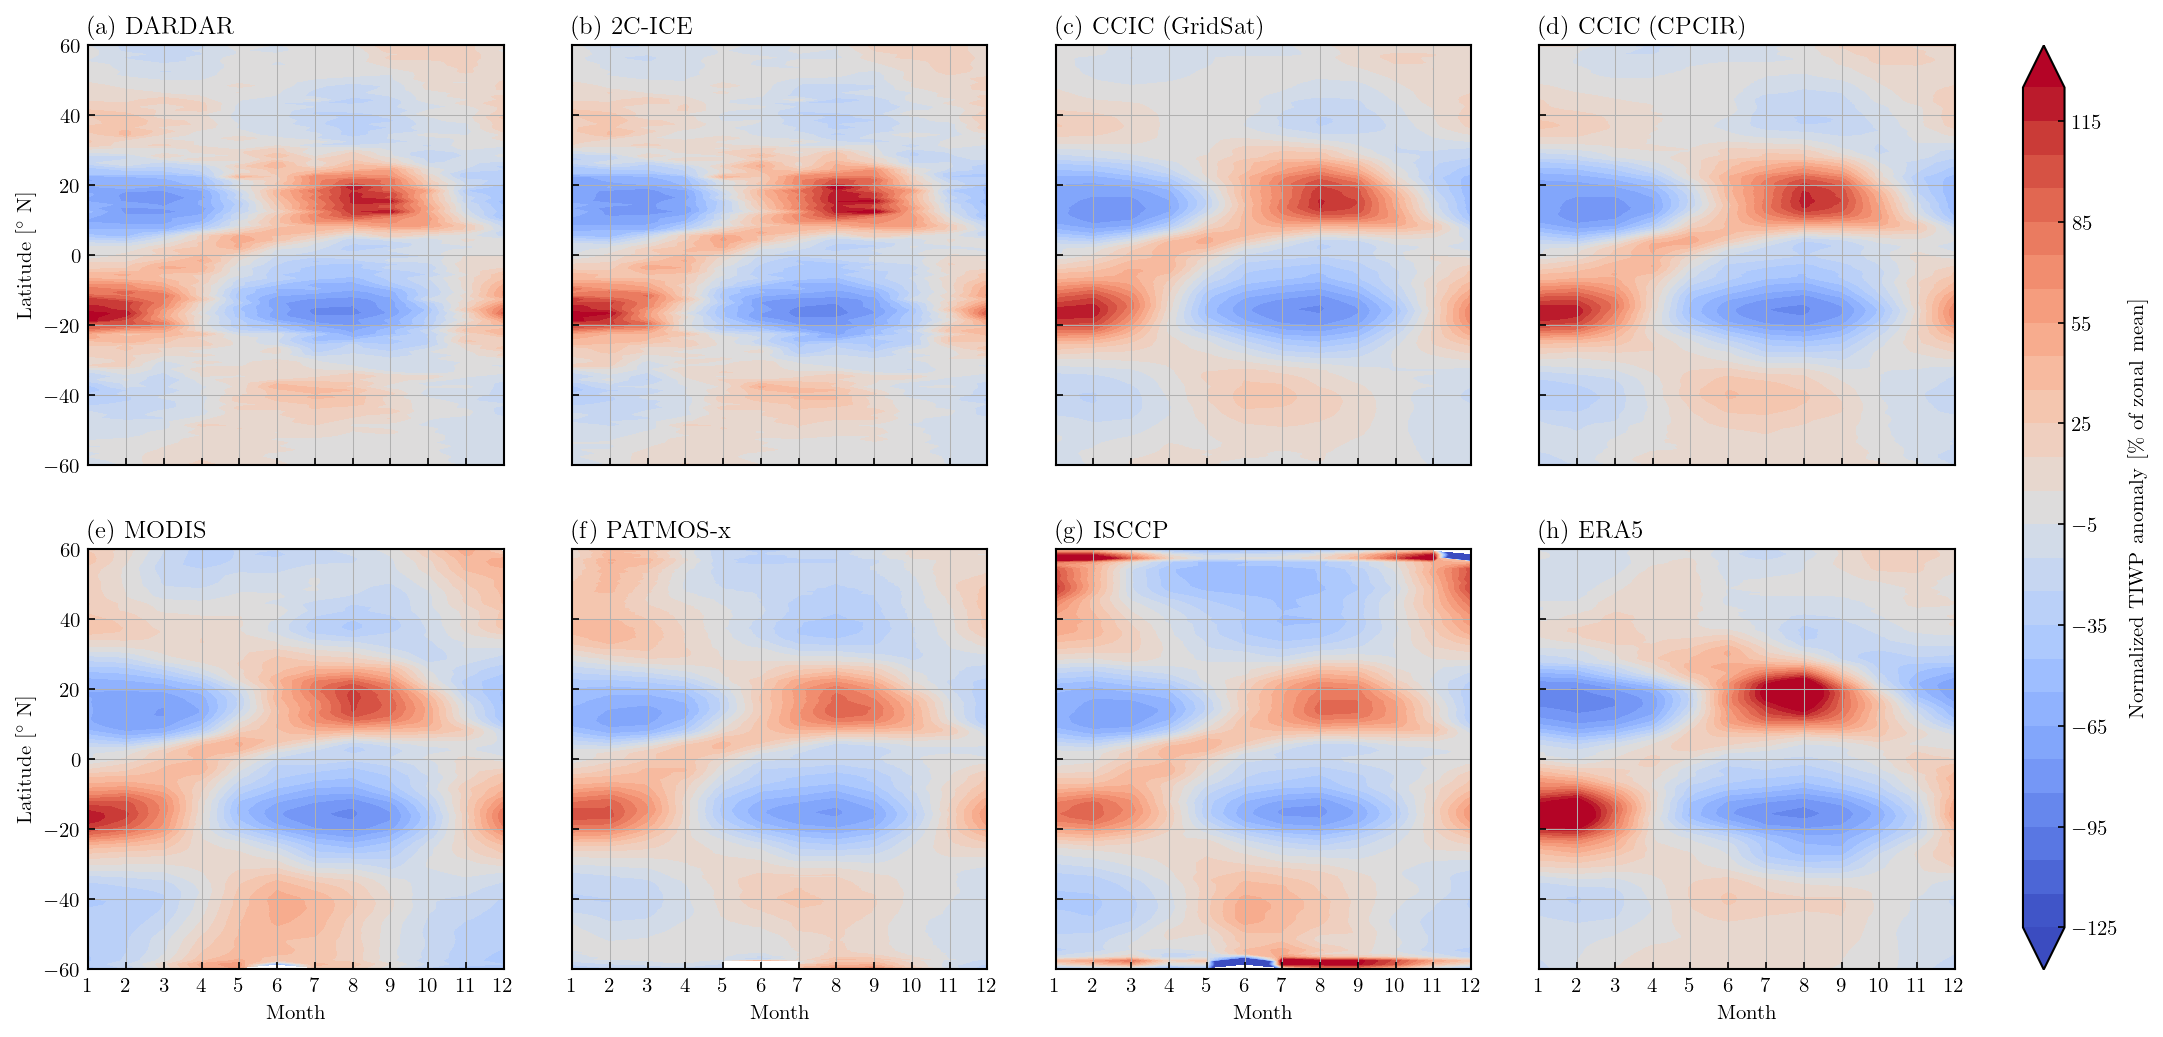

In [157]:
import matplotlib 
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib import colormaps

fig = plt.figure(figsize=(17, 8))
gs = GridSpec(2, 5, width_ratios=[1.0, 1.0, 1.0, 1.0, 0.1])
              
levels = np.linspace(-125, 125, 26)
norm = Normalize(-125, 125)
cmap = colormaps["coolwarm"]

results = {
    "DARDAR": dardar_hovmoller_n,
    "2C-ICE": twocice_hovmoller_n,
    "CCIC (GridSat)": ccic_gridsat_hovmoller_n,
    "CCIC (CPCIR)": ccic_cpcir_hovmoller_n,
    "MODIS": modis_hovmoller_n,
    "PATMOS-x": patmos_hovmoller_n,
    "ISCCP": isccp_hovmoller_n,
    "ERA5": era5_hovmoller_n
}


for ind, (name, res) in enumerate(results.items()):
    row_ind = ind // 4
    col_ind = ind % 4
    
    ax = fig.add_subplot(gs[row_ind, col_ind])
    ax.set_title(f"({chr(ord('a') + ind)}) {name}")
    lats = res.latitude
    month = res.month if "month" in res.dims else res.time.dt.month
    if name == "MODIS":
        m = ax.contourf(month, lats, 100 * res[..., ::-1].T, levels=levels, extend="both", cmap=cmap, norm=norm)
    else:
        m = ax.contourf(month, lats, 100 * res.T, levels=levels, extend="both", cmap=cmap, norm=norm)
    ax.set_ylim(-60, 60)

    ax.set_yticks(np.linspace(-60, 60, 7))
    ax.set_xticks(np.arange(1, 13))

    if col_ind > 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("Latitude [$^\circ$ N]")

    if row_ind < 1:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Month")

    ax.grid(True)


cbar_ax = fig.add_subplot(gs[:, -1])
fig.colorbar(m, cax=cbar_ax, label="Normalized TIWP anomaly [\% of zonal mean]")
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(Path("..") / "figures" / "hovmoller_normalized.png", bbox_inches = 'tight')
plt.show()